In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV


import warnings
warnings.simplefilter('ignore')

In [2]:
tourney_result = pd.read_csv('../input/kaggle_data/MNCAATourneyCompactResults.csv')

tourney_result = tourney_result.drop(['DayNum', 'WScore', 'LScore', 'WLoc', 'NumOT'],axis=1)

In [3]:
tm_to_pct = pd.read_csv('../input/self_calculated/tm_to_pct.csv')

opp_to_pct = pd.read_csv('../input/self_calculated/opp_to_pct.csv')

tm_orb_pct = pd.read_csv('../input/self_calculated/tm_orb_pct.csv')

tm_drb_pct = pd.read_csv('../input/self_calculated/tm_drb_pct.csv')

tm_efg_pct = pd.read_csv('../input/self_calculated/tm_efg_pct.csv')

opp_efg_pct = pd.read_csv('../input/self_calculated/opp_efg_pct.csv')

tm_fta_rate = pd.read_csv('../input/self_calculated/tm_fta_rate.csv')

opp_fta_rate = pd.read_csv('../input/self_calculated/opp_fta_rate.csv')

tm_ft_pct = pd.read_csv('../input/self_calculated/tm_ft_pct.csv')

adj_eff = pd.read_csv('../input/self_calculated/adjusted_efficiencies.csv')

In [4]:
all_teams = tm_to_pct.merge(opp_to_pct,on=['Season','TeamID'])

all_teams = all_teams.merge(tm_efg_pct,on=['Season','TeamID'])

all_teams = all_teams.merge(opp_efg_pct,on=['Season','TeamID'])

all_teams = all_teams.merge(tm_orb_pct,on=['Season','TeamID'])

all_teams = all_teams.merge(tm_drb_pct,on=['Season','TeamID'])

all_teams = all_teams.merge(tm_fta_rate,on=['Season','TeamID'])

all_teams = all_teams.merge(opp_fta_rate,on=['Season','TeamID'])

all_teams = all_teams.merge(tm_ft_pct, on=['Season','TeamID'])

all_teams = all_teams.merge(adj_eff, on=['Season','TeamID'])

all_teams = all_teams.drop(['raw_stat_x','raw_stat_y'],axis=1)

all_teams.columns = ['Season','TeamID','tm_to_pct','opp_to_pct','tm_efg_pct','opp_efg_pct','tm_orb_pct','tm_drb_pct','tm_fta_rate','opp_fta_rate','tm_ft_pct','RawNetEff','AdjNetEff']

all_teams = all_teams.drop(['RawNetEff'],axis=1)

all_teams

,Season,TeamID,tm_to_pct,opp_to_pct,tm_efg_pct,opp_efg_pct,tm_orb_pct,tm_drb_pct,tm_fta_rate,opp_fta_rate,tm_ft_pct,AdjNetEff
0,2003,1102,15.872084,17.798565,0.582707,0.502464,0.175081,0.635816,0.421368,0.441832,0.651357,2.549120
1,2003,1103,13.919669,15.578675,0.529022,0.541848,0.310323,0.622063,0.446294,0.362710,0.736390,-0.892082
2,2003,1104,14.011472,15.966849,0.499913,0.455915,0.388323,0.704215,0.383592,0.328486,0.709898,16.005042
3,2003,1105,17.761582,17.204037,0.448812,0.541033,0.302893,0.621742,0.318684,0.462054,0.705986,-17.739565
4,2003,1106,18.702961,16.605175,0.468470,0.479952,0.320525,0.664909,0.288569,0.453531,0.646421,-9.118578
5,2003,1107,15.205370,14.608408,0.488055,0.540758,0.232878,0.587119,0.244217,0.294650,0.733509,-18.899802
6,2003,1108,18.128507,16.397326,0.466169,0.505169,0.332716,0.635258,0.344625,0.425830,0.668596,-11.597642
7,2003,1110,15.258997,15.705932,0.513083,0.499381,0.302637,0.672593,0.326789,0.311338,0.681452,2.761780
8,2003,1111,15.570132,16.806325,0.501395,0.524603,0.312339,0.652121,0.421886,0.320785,0.719530,-0.574032
9,2003,1112,13.258635,16.974193,0.530209,0.442962,0.412117,0.703473,0.397280,0.292509,0.701429,27.877550


In [5]:
df1 = tourney_result.copy()
df2 = all_teams.copy()

df = df1.merge(df2,left_on=['Season','WTeamID'],right_on=['Season','TeamID'], how="inner")

df = df.drop(['TeamID'],axis=1)

df = df.merge(df2,left_on=['Season','LTeamID'],right_on=['Season','TeamID'],how='inner')
df = df.drop(['TeamID'],axis=1)

Index(['Season', 'WTeamID', 'LTeamID', 'tm_to_pct_x', 'opp_to_pct_x',
       'tm_efg_pct_x', 'opp_efg_pct_x', 'tm_orb_pct_x', 'tm_drb_pct_x',
       'tm_fta_rate_x', 'opp_fta_rate_x', 'tm_ft_pct_x', 'AdjNetEff_x',
       'tm_to_pct_y', 'opp_to_pct_y', 'tm_efg_pct_y', 'opp_efg_pct_y',
       'tm_orb_pct_y', 'tm_drb_pct_y', 'tm_fta_rate_y', 'opp_fta_rate_y',
       'tm_ft_pct_y', 'AdjNetEff_y'],
      dtype='object')


In [8]:
df_win = df.copy()

df_win['tm_to_pct_x'] = df_win['tm_to_pct_x']/100
df_win['tm_to_pct_y'] = df_win['tm_to_pct_y']/100

df_win['opp_to_pct_x'] = df_win['opp_to_pct_x']/100
df_win['opp_to_pct_y'] = df_win['opp_to_pct_y']/100

df_lose = df_win.copy()

df_lose['tm_to_pct_x'] = df_win['tm_to_pct_y']
df_lose['tm_to_pct_y'] = df_win['tm_to_pct_x']

df_lose['tm_efg_pct_x'] = df_win['tm_efg_pct_y']
df_lose['tm_efg_pct_y'] = df_win['tm_efg_pct_x']

df_lose['tm_orb_pct_x'] = df_win['tm_orb_pct_y']
df_lose['tm_orb_pct_y'] = df_win['tm_orb_pct_x']

df_lose['tm_fta_rate_x'] = df_win['tm_fta_rate_y']
df_lose['tm_fta_rate_y'] = df_win['tm_fta_rate_x']

df_lose['opp_to_pct_x'] = df_win['opp_to_pct_y']
df_lose['opp_to_pct_y'] = df_win['opp_to_pct_x']

df_lose['opp_efg_pct_x'] = df_win['opp_efg_pct_y']
df_lose['opp_efg_pct_y'] = df_win['opp_efg_pct_x']

df_lose['tm_drb_pct_x'] = df_win['tm_drb_pct_y']
df_lose['tm_drb_pct_y'] = df_win['tm_drb_pct_x']

df_lose['opp_fta_rate_x'] = df_win['opp_fta_rate_y']
df_lose['opp_fta_rate_y'] = df_win['opp_fta_rate_x']

df_lose['tm_fta_rate_x'] = df_win['opp_fta_rate_y']
df_lose['opp_fta_rate_y'] = df_win['opp_fta_rate_x']

df_lose['AdjNetEff_x'] = df_win['AdjNetEff_y']
df_lose['AdjNetEff_y'] = df_win['AdjNetEff_x']

In [15]:
df_win['result'] = 1
df_lose['result'] = 0

df_final = pd.concat([df_win,df_lose],axis=0)

df_final['AdjNetEff_Diff'] = df_final['AdjNetEff_x'] - df_final['AdjNetEff_y']

df_final = df_final[df_final['Season']<2015]

df_final = df_final.drop(['Season','WTeamID','LTeamID','AdjNetEff_x','AdjNetEff_y'],axis=1)
#df_final = df_final.drop(['Season','WTeamID','LTeamID'],axis=1)

df_final

,tm_to_pct_x,opp_to_pct_x,tm_efg_pct_x,opp_efg_pct_x,tm_orb_pct_x,tm_drb_pct_x,tm_fta_rate_x,opp_fta_rate_x,tm_ft_pct_x,tm_to_pct_y,opp_to_pct_y,tm_efg_pct_y,opp_efg_pct_y,tm_orb_pct_y,tm_drb_pct_y,tm_fta_rate_y,opp_fta_rate_y,tm_ft_pct_y,result,AdjNetEff_Diff
0,0.173263,0.118919,0.479754,0.532603,0.350514,0.636009,0.362902,0.376445,0.762768,0.157748,0.144066,0.485771,0.522823,0.329131,0.658348,0.484603,0.361217,0.619952,1,-6.491479
1,0.132586,0.169742,0.530209,0.442962,0.412117,0.703473,0.397280,0.292509,0.701429,0.157558,0.146190,0.488483,0.485285,0.366334,0.712340,0.365030,0.314083,0.657848,1,25.295647
2,0.132586,0.169742,0.530209,0.442962,0.412117,0.703473,0.397280,0.292509,0.701429,0.151288,0.159322,0.545311,0.480530,0.366716,0.714861,0.446145,0.324519,0.721204,1,11.803546
3,0.132586,0.169742,0.530209,0.442962,0.412117,0.703473,0.397280,0.292509,0.701429,0.120951,0.140477,0.541660,0.448696,0.309392,0.684514,0.391508,0.267544,0.759887,1,6.483768
4,0.141060,0.174627,0.534947,0.486342,0.414094,0.701953,0.473241,0.376967,0.669737,0.136522,0.161615,0.518368,0.455917,0.370133,0.690344,0.397734,0.378112,0.653614,1,1.013994
5,0.186654,0.169670,0.565467,0.493446,0.374608,0.666246,0.469109,0.356625,0.765753,0.144084,0.184280,0.564683,0.472223,0.355384,0.678357,0.373890,0.301040,0.692890,1,-11.255168
6,0.142236,0.165912,0.529460,0.489442,0.333434,0.716649,0.359461,0.311497,0.685512,0.153161,0.172368,0.545492,0.486652,0.307967,0.701017,0.409730,0.405147,0.770358,1,0.215371
7,0.147275,0.143282,0.532739,0.423644,0.397570,0.671671,0.363548,0.342219,0.674208,0.155805,0.173801,0.531840,0.429978,0.350585,0.695281,0.487125,0.439414,0.753004,1,-1.433052
8,0.147275,0.143282,0.532739,0.423644,0.397570,0.671671,0.363548,0.342219,0.674208,0.144211,0.152791,0.516059,0.449102,0.398954,0.711946,0.372233,0.361062,0.675466,1,3.181876
9,0.140377,0.186465,0.538401,0.468795,0.383807,0.669683,0.486971,0.389676,0.709026,0.171571,0.137448,0.558423,0.493442,0.370069,0.654704,0.469218,0.383487,0.700549,1,17.349056


In [18]:
X = df_final.drop('result',axis=1)
y = df_final.result
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [19]:
logreg = LogisticRegression()
params = {'C':np.logspace(start=-5,stop=3,num=9)}
clf = GridSearchCV(logreg,params,scoring='neg_log_loss',refit=True)
clf.fit(X_train, y_train)
print('Best log_loss: {:.4}, with best C: {}'.format(clf.best_score_, clf.best_params_['C']))

Best log_loss: -0.3475, with best C: 1000.0


In [20]:
result = logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)

In [21]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)

cnf_matrix

array([[192,  25],
       [ 49, 180]], dtype=int64)

In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print('Log-Loss:',metrics.log_loss(y_test,y_pred))

Accuracy: 0.8340807174887892
Precision: 0.8780487804878049
Recall: 0.7860262008733624
Log-Loss: 5.730693818742478


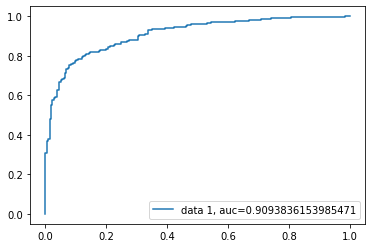

In [23]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label='data 1, auc='+str(auc))
plt.legend(loc=4)
plt.show()

In [24]:
from sklearn.metrics import log_loss
from sklearn.calibration import CalibratedClassifierCV

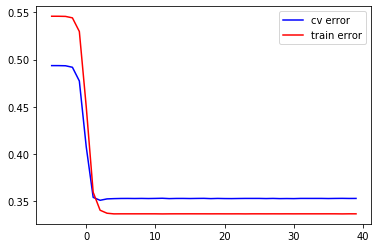

In [25]:
alpha=[10**x for x in np.arange(-5, 40, dtype=float)]
log_alpha=np.arange(-5,40)

cv_err=[]
train_err=[]
for a in alpha:
    clf=LogisticRegression(C=a, penalty='l2', class_weight='balanced')
    clf.fit(X_train, y_train)
    sig_clf=CalibratedClassifierCV(clf)
    sig_clf.fit(X_train, y_train)
    
    predict_y=sig_clf.predict_proba(X_test)
    cv_err.append(log_loss(y_test, predict_y))
    
    predict_y=sig_clf.predict_proba(X_train)
    train_err.append(log_loss(y_train, predict_y))

plt.plot(log_alpha, cv_err, label='cv error', c='b')
plt.plot(log_alpha, train_err, label='train error', c='r')
plt.legend()
plt.show()

In [26]:
alpha[np.argmin(cv_err)]

100.0

In [27]:
np.min(cv_err)

0.35084764053357603

In [28]:
clf2 =LogisticRegression(C=alpha[np.argmin(cv_err)], penalty='l2', class_weight='balanced')
clf2.fit(X_train, y_train)

LogisticRegression(C=100.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [30]:
columns = X_train.columns
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, clf2.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
6,tm_fta_rate_x,47.822569
9,tm_to_pct_y,33.521826
1,opp_to_pct_x,32.707730
12,opp_efg_pct_y,14.478940
2,tm_efg_pct_x,12.798342
5,tm_drb_pct_x,5.225466
17,tm_ft_pct_y,2.689787
4,tm_orb_pct_x,2.566948
16,opp_fta_rate_y,0.510977
18,AdjNetEff_Diff,-0.020751


Otpimal number of features: 17


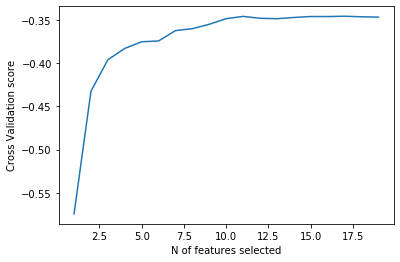

In [31]:
min_features_to_select = 1 
lr_clf = LogisticRegression(C=1000000.0, max_iter=100, solver='liblinear')
rfecv = RFECV(estimator=lr_clf, step=1, cv=10, scoring='neg_log_loss', min_features_to_select=min_features_to_select)
rfecv.fit(X_train,y_train)

print('Otpimal number of features: %d' % rfecv.n_features_)

plt.figure()
plt.xlabel('N of features selected')
plt.ylabel('Cross Validation score')
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [32]:
for i in range(X_train.shape[1]):
    print('Column %s, Selected %s, Rank %.3f' % (X_train.columns[i], rfecv.support_[i], rfecv.ranking_[i]))

Column tm_to_pct_x, Selected True, Rank 1.000
Column opp_to_pct_x, Selected True, Rank 1.000
Column tm_efg_pct_x, Selected True, Rank 1.000
Column opp_efg_pct_x, Selected True, Rank 1.000
Column tm_orb_pct_x, Selected True, Rank 1.000
Column tm_drb_pct_x, Selected True, Rank 1.000
Column tm_fta_rate_x, Selected True, Rank 1.000
Column opp_fta_rate_x, Selected True, Rank 1.000
Column tm_ft_pct_x, Selected True, Rank 1.000
Column tm_to_pct_y, Selected True, Rank 1.000
Column opp_to_pct_y, Selected True, Rank 1.000
Column tm_efg_pct_y, Selected True, Rank 1.000
Column opp_efg_pct_y, Selected True, Rank 1.000
Column tm_orb_pct_y, Selected True, Rank 1.000
Column tm_drb_pct_y, Selected True, Rank 1.000
Column tm_fta_rate_y, Selected True, Rank 1.000
Column opp_fta_rate_y, Selected False, Rank 2.000
Column tm_ft_pct_y, Selected True, Rank 1.000
Column AdjNetEff_Diff, Selected False, Rank 3.000
